In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('bank_notes.csv')

In [4]:
df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.tail()

,variance,skewness,curtosis,entropy,Target
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
df.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Target      0
dtype: int64

In [9]:
# determine the dependent and independent variable 
X = df.drop('Target',axis = 1)
Y = df['Target']

In [10]:
# Splitting the data into test and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 234,test_size = 0.2)

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [12]:
#Finding the suitable number of estimators for random forest algorithm using cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
# Define the parameter grid
param_grid = {
    'n_estimators' : [50,100,200,300,400,500]
}

In [14]:
# Initialize the model 
rf = RandomForestClassifier(random_state = 43)

In [15]:
# Use GridSearchCv to search for best parameter
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=43),
             param_grid={'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='accuracy')

In [55]:
# Get the best number of estimators
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Optimal number of estimators : {best_n_estimators}")

Optimal number of estimators : 50


In [18]:
# train the random forest model with best parameters
rf_best = RandomForestClassifier(n_estimators = 50,random_state = 34)
rf_best.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=34)

In [19]:
# make the prediction on test set
y_pred = rf_best.predict(x_test)

In [26]:
# Evaluate the model 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9854545454545455


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['1','0']))



Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       160
           0       0.98      0.98      0.98       115

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



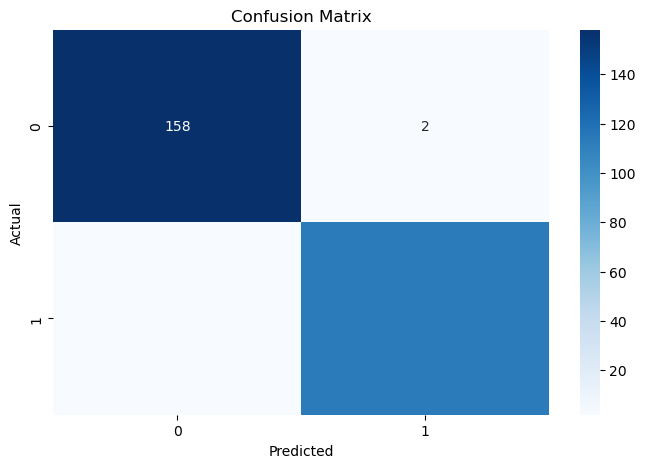

In [31]:
# Creating confusion matrix
import seaborn as sns
conf = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,5))
sns.heatmap(conf,annot = True,fmt = "d", cmap = "Blues",xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
fn = df.columns
names = []
for name in fn: 
    names.append(name)
names.remove('Target')
names

['variance', 'skewness', 'curtosis', 'entropy']


Feature Importances:
variance    0.567278
skewness    0.225154
curtosis    0.160338
entropy     0.047230
dtype: float64


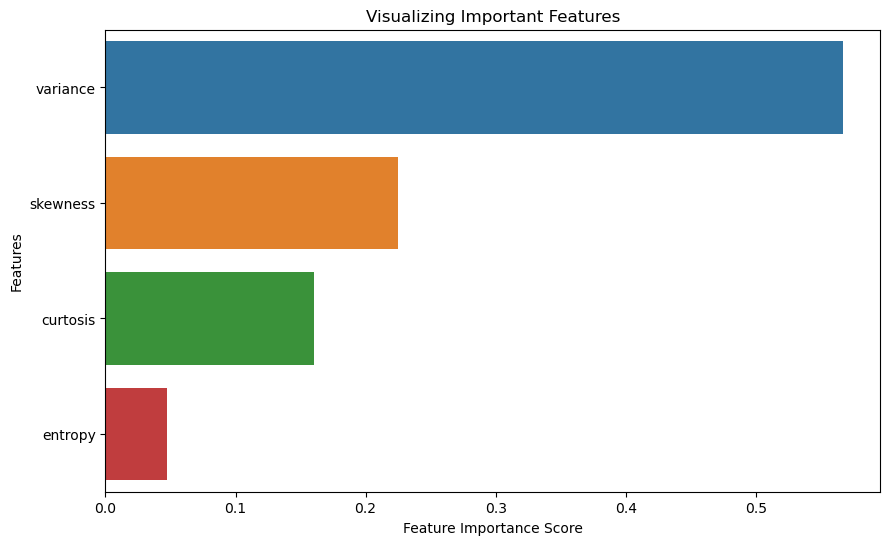

In [48]:
# Feature Importances

feature_importances = pd.Series(rf_best.feature_importances_, index=names)
feature_importances = feature_importances.sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [52]:
rf_best.predict([[-2.63,-0.551,2.8032,1.19520]])

array([1], dtype=int64)